# Team George Washington Carver Presents: Project 3 #

# Food Demand in Guatemala #

##### For context of our team's code and presentation overall, Guatemala is a country in Central America, and shares its border with the south of Mexico. It has high rates of climate related disasters and deeply divided socioeconomic classes, where poverty is concentrated in the ​​​​Noroccidente region. As a result, a large portion of Guatemala faces malnutrition and food insecurity. 
#### We hope you are find the contents of food demand in Guatemala in our code interesting!

# Installations & Imports

In [32]:
!pip install python-gnupg 
!pip install eep153_tools --upgrade
!pip install cufflinks

In [2]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets


# Source: Guatemala Dataset from EdStem

#### We used the information in the provided Guatemala spreadsheet in EdStem, then edited it in order to simplify down to the 8 different regions in Guatemala with their demand (in pounds) for each food item. It is curated to display the food items that are commonly consumed in Guatemala. This spreadsheet is converted into a csv file and can be found in our repository!

##### Edstem Guatemala Source: https://docs.google.com/spreadsheets/d/1YupX14TogoubSrlHtG9OgfBdKUhsss29L63mcNDNCUo/

In [3]:
Guatemala = '1YupX14TogoubSrlHtG9OgfBdKUhsss29L63mcNDNCUo'

In [4]:
x = read_sheets(Guatemala,sheet='Food Expenditures')
x.columns.name = 'j'
x

j,i,t,m,Cooking Oil,Water (bottle),Avocado,Mineral Water,Garlic,Mushrooms,Celery,...,Tea,Tomatoes,Tortillas,Tostadas,Beef Entrails,Chicken Giblets,Yogurt,Yucca,Carrots,Leafcutter Ants and Other Insect
0,1,2000,Metropolitana,7.5,20.0,5.0,6.00,1.00,NaN,2.0,...,7.0,9.0,60.0,NaN,NaN,21.0,NaN,NaN,3.6,NaN
1,10,2000,Metropolitana,15.0,15.0,30.0,NaN,2.00,20.0,2.0,...,8.5,14.0,30.0,NaN,30.0,12.5,NaN,NaN,7.5,NaN
2,100,2000,Metropolitana,13.0,10.5,NaN,16.00,0.25,NaN,2.0,...,NaN,2.5,4.0,NaN,16.0,NaN,NaN,NaN,3.0,NaN
3,1000,2000,Central,9.5,10.0,NaN,NaN,1.50,NaN,1.5,...,NaN,9.0,60.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN
4,1001,2000,Central,10.0,20.0,5.0,7.75,1.00,NaN,2.0,...,22.0,6.0,37.5,NaN,12.0,NaN,NaN,1.0,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,995,2000,Central,NaN,NaN,NaN,18.00,NaN,NaN,1.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
7253,996,2000,Central,13.0,12.0,NaN,12.00,6.00,NaN,2.0,...,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7254,997,2000,Central,1.5,NaN,NaN,6.50,NaN,NaN,NaN,...,NaN,8.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7255,998,2000,Central,16.0,37.5,4.0,10.00,0.75,NaN,NaN,...,NaN,9.0,10.0,NaN,NaN,NaN,NaN,2.0,6.0,NaN


In [5]:
p = pd.read_csv('Team George Washington Guatemala - Food Prices.csv')
p = p.drop(p.columns[1], axis=1)
p = p.T
p = p.set_index(p.iloc[:,0])
p.columns = p.iloc[0]
p = p.drop(p.columns[0], axis=1).iloc[1:]
p

j,Cooking Oil,Water (bottle),Avocado,Mineral Water,Garlic,Mushrooms,Celery,Rice,Peas,Corn Atole,...,Tea,Tomatoes,Tortillas,Tostadas,Beef Entrails,Chicken Giblets,Yogurt,Yucca,Carrots,Leafcutter Ants and Other Insect
0,,,,,,,,,,,,,,,,,,,,,
Central,5.010737261,0.4545454447,1.865671595,2.75077949,4.54545457,12,2.262489754,2.5,3,1.801801779,...,8.341667044,1.5,1.250000028,7.499999969,7.5,4,8.227272722,2,1.06382979,8
Metropolitana,5.368647065,0.2405002401,3.544776031,2.731270434,4.54545457,26,3,2.5,6,2.702702668,...,7.500000168,2,1.04166669,6.683928809,10,4.5,9.090908894,2.5,1.06382979,NaN
Noroccidente,4.545454447,0.2405002401,1.492537276,3.209242684,4.54545457,7,2.265861026,2.25,2.5,1.801801779,...,9.895833555,2,1.04166669,2.000000045,6,4,8.181818004,1,0.638297874,4.5
Nororiente,4.563468033,0.2645502553,3.731343191,3.209242684,9.09090914,10,2.5,2.5,8,2.162162134,...,7.500000168,2.45,2.08333338,3.12500007,10,5,8.658008741,2,2.12765958,6
Norte,5.368647065,0.2405002401,1.492537276,3.209242684,3.787878808,4,2,2.5,2.5,1.801801779,...,12.50000028,2,1.04166669,5.000000112,7,4,7.272727115,1.339285714,2.12765958,NaN
Peten,4.999999892,0.3006252964,1.492537276,3.85109122,9.09090914,5,3,2.5,4,1.801801779,...,NaN,2.5,1.04166669,3.750000084,7,4,8.409090727,2,2.12765958,6
Suroccidente,3.86363628,0.2457002404,1.492537276,3.209242684,4.54545457,10,2.5,2.239999962,4,1.801801779,...,12.50000028,2,1.134259285,3.645833415,8,3.875,6.81818167,1.5,0.6205673775,5
Suroriente,5.368647065,0.2886002882,2.985074553,3.209242684,4.54545457,12,2.670231683,2.5,5,2.477477446,...,150.0000034,2,1.38888892,12.50000028,10,4,4.545454447,2,2.12765958,4.25


In [6]:
d = read_sheets(Guatemala,sheet="Household Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.T.groupby('j').sum().T
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

/tmp/ipykernel_542/3968031923.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace(0,np.nan) # Replace zeros with missing


In [7]:
d.head()

,,k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural
i,t,m,,,,,,,,,,,,,,,,
1,2000,Metropolitana,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1.386294,0
2,2000,Metropolitana,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1.098612,0
3,2000,Metropolitana,0,0,0,0,2,0,0,0,1,0,1,1,1,0,1.791759,0
4,2000,Metropolitana,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0
5,2000,Metropolitana,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1.098612,0


In [8]:
y.head()

,,j,Avocado,Bananas,Beans,Beef,Beef Entrails,Beer,Beets,Bread (french),Bread (sliced),Bread (sweet),...,Tomato Sauce,Tomatoes,Tortillas,Tostadas,Vegetable Oil,Water (bottle),Watermelon,Wheat Flour,Yogurt,Yucca
i,t,m,,,,,,,,,,,,,,,,,,,,,
1,2000,Metropolitana,1.609438,2.639057,1.609438,5.828946,NaN,NaN,NaN,3.401197,NaN,3.401197,...,1.504077,2.197225,4.094345,NaN,NaN,2.995732,NaN,NaN,NaN,NaN
10,2000,Metropolitana,3.401197,3.583519,2.302585,5.762051,3.401197,3.178054,NaN,4.430817,2.079442,2.351375,...,1.252763,2.639057,3.401197,NaN,NaN,2.708050,2.708050,1.386294,NaN,NaN
100,2000,Metropolitana,NaN,2.833213,NaN,4.499810,2.772589,NaN,1.504077,1.791759,2.397895,2.302585,...,3.521939,0.916291,1.386294,NaN,NaN,2.351375,NaN,2.525729,NaN,NaN
1000,2000,Central,NaN,3.091042,2.014903,5.075174,NaN,NaN,NaN,3.401197,NaN,3.401197,...,2.302585,2.197225,4.094345,NaN,NaN,2.302585,NaN,0.916291,NaN,NaN
1001,2000,Central,1.609438,2.890372,2.014903,4.927254,2.484907,NaN,1.321756,3.113515,1.909543,3.113515,...,-0.287682,1.791759,3.624341,NaN,NaN,2.995732,0.693147,1.558145,NaN,0.0


## Estimation

In [9]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [10]:
#pip show cfe


In [11]:
from cfe import Regression
result = Regression(y=y,d=d)

In [12]:
result.predicted_expenditures()

i     t     m              j             
1     2000  Metropolitana  Avocado             7.131134
                           Bananas            16.368000
                           Beans               9.351316
                           Beef              102.055889
                           Beef Entrails      13.977229
                                                ...    
7276  2000  Suroriente     Tostadas            8.796111
                           Water (bottle)      9.580927
                           Watermelon          7.935121
                           Wheat Flour         4.943983
                           Yucca               3.456677
Length: 515736, dtype: float64

<Axes: xlabel='yhat', ylabel='y'>

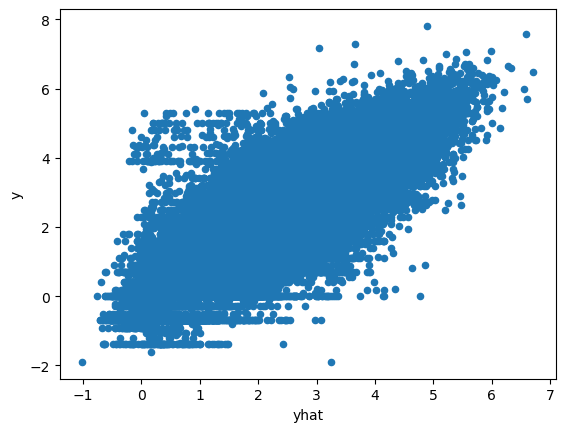

In [13]:
%matplotlib inline
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

## Parameters 

#### Relative Income Elasticity

##### The beta coefficients determine how income elastic different foods are, where higher values are more elastic. With higher elasticity, their demand for the food is more price responsive if prices change for that food. Below, we created a plot with different confidence intervals 

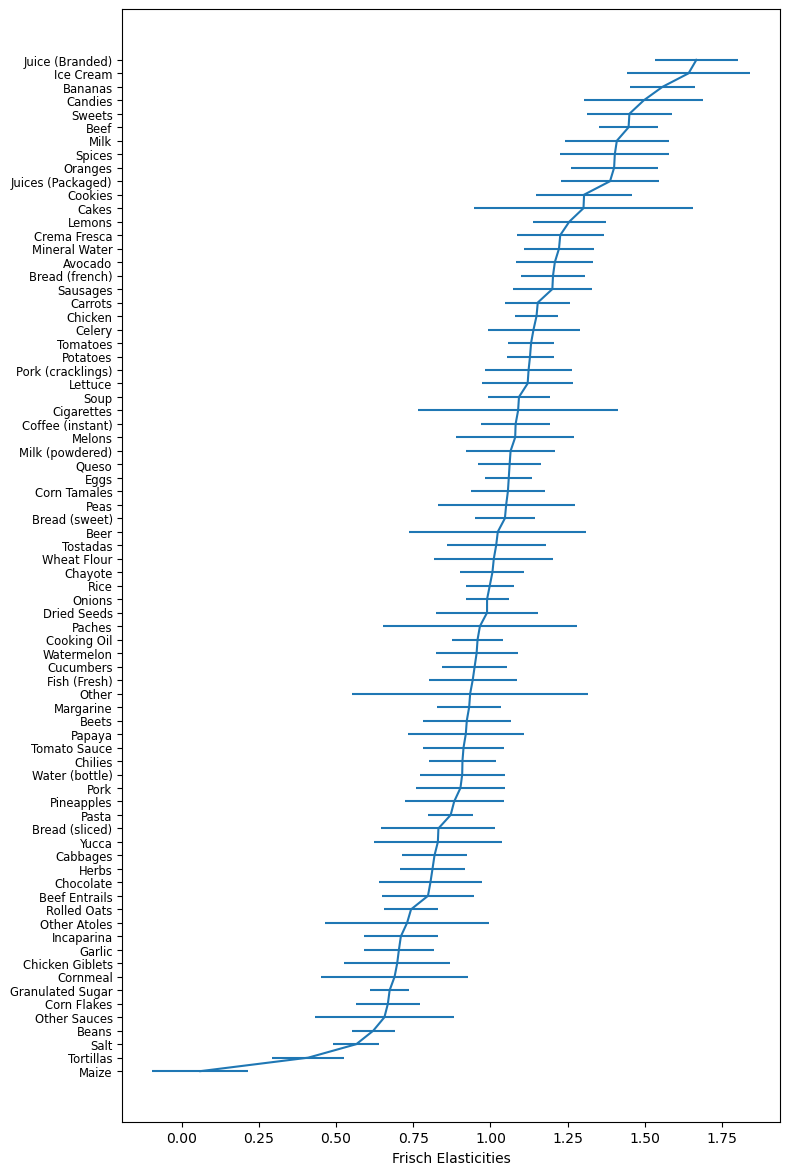

In [14]:
ax = result.graph_beta()

###### Values of Beta Coefficients with corresponding elasticities

In [15]:
result.get_beta()

j
Avocado           1.208501
Bananas           1.557200
Beans             0.620259
Beef              1.447294
Beef Entrails     0.797537
                    ...   
Tostadas          1.018462
Water (bottle)    0.908400
Watermelon        0.955107
Wheat Flour       1.010762
Yucca             0.829638
Name: beta, Length: 76, dtype: float64

###### A higher income elasticity coefficient beta indicates that the demand for the good is more sensitive to changes in income, while a lower coefficient suggests less sensitivity. We can draw the conclusion from this that people in Guatemala consume Maize, Tortillas, Salt, Beans, and other foods that have low income elasticity as a necessary daily diet, while buy Ice cream, Juice, and Bananas that have high income elasticity only when their income level is high enough. This shows that if prices are higher for goods like ice cream, juice, and bananas, then Guatemalans will generally stop buying or reduce their demands for it. On the other hand, maize, tortillas, and salt are staples and they will remain demanding it. 

### Demand and Household Composition

In [16]:
result.get_gamma()


k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural,Constant
j,,,,,,,,,,,,,,,,,
Avocado,-0.113787,-0.154271,-0.052185,-0.075399,-0.043531,-0.057057,-0.007848,-0.032615,0.037288,0.085916,0.092047,0.204477,0.037729,0.004733,0.264470,-0.290258,1.715108
Bananas,-0.132104,-0.160179,-0.078016,-0.077231,-0.065582,-0.058726,-0.005501,-0.000520,0.054295,0.099780,0.058638,0.163866,-0.034846,0.069719,0.290604,-0.417070,2.573631
Beans,0.008229,-0.012377,0.041968,0.015699,0.078386,0.036391,0.155165,0.069580,0.085326,0.039537,0.091785,0.052839,0.120704,0.086230,0.321519,0.167655,2.570693
Beef,-0.175282,-0.143385,-0.095217,-0.083608,-0.051129,-0.060364,0.004381,-0.001599,0.091003,0.124310,0.137452,0.140678,0.013439,-0.019238,0.396879,-0.405156,4.185058
Beef Entrails,0.040482,-0.030306,-0.046508,0.028354,0.049665,0.061699,0.010200,0.093729,0.022685,0.124958,0.080566,0.056687,0.042477,0.013257,0.058879,-0.229071,2.585558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tostadas,-0.222922,-0.109068,-0.134434,-0.059171,0.007077,-0.099574,0.022812,-0.055201,-0.101009,-0.048134,-0.054742,-0.057514,-0.118890,-0.107662,0.648027,-0.082593,2.100750
Water (bottle),0.006573,-0.005665,0.001005,-0.018112,-0.084946,-0.010131,-0.027803,0.012465,0.060607,0.025416,0.100745,0.228945,0.024621,0.119268,0.067414,-0.525289,2.564404
Watermelon,-0.004826,-0.041615,0.003598,-0.073471,-0.032490,0.049048,0.002484,0.055817,0.027256,0.072846,0.021781,0.091616,-0.025972,-0.067859,0.180818,-0.123484,1.935350


## Welfare

<Axes: ylabel='Density'>

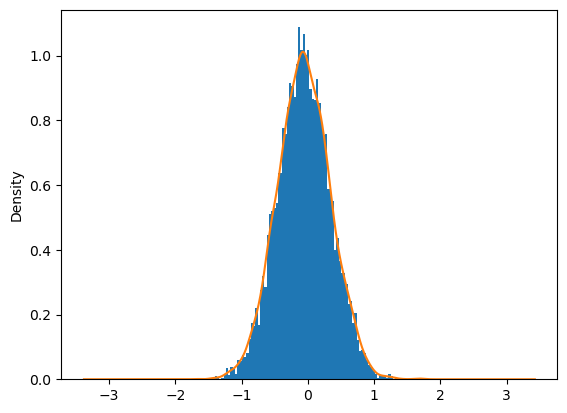

In [17]:
ax = result.get_w().plot.hist(bins=100,density=True)
result.get_w().plot.kde(ax=ax)

In [18]:
result.to_pickle('Guatemala_1.pickle')

## Demand and Utility

#### Budgets

In [19]:
import numpy as np

xhat = result.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

## Reference Prices

In [20]:
p_numeric = p.map(pd.to_numeric, errors='coerce')
pbar = p_numeric.mean()

In [21]:
pbar = pbar[result.beta.index] # Only use prices for goods we can estimate

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,p=pbar,j='Beans'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

## Demand as a function of prices

#### We define a demand_curve function to visualize demand curve for different goods. 

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
  
def demand_curve(use):
    # Vary prices from 50% to 200% of reference.
    scale = np.linspace(.5,2,20)
    
    # Demand for Beans for household at median budget
    plt.plot([result.demands(xref,my_prices(pbar[use]*s,pbar,use))[use] for s in scale],scale)
    
    # Demand for Beans for household at 25% percentile
    plt.plot([result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar,use))[use] for s in scale],scale)
    
    # Demand for Beans for household at 75% percentile
    plt.plot([result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar,use))[use] for s in scale],scale)

    plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
    plt.xlabel(f"Quantities of {use} Demanded")

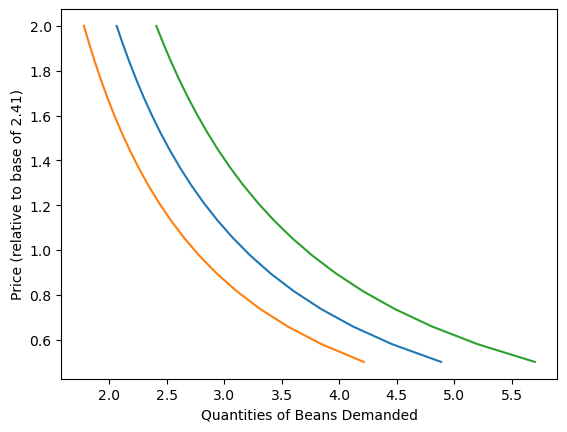

In [23]:
demand_curve('Beans')

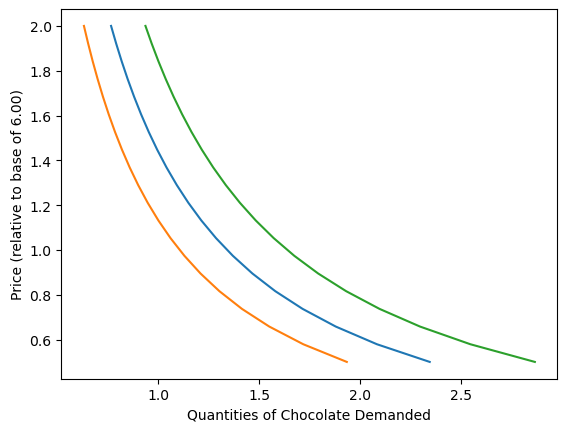

In [24]:
demand_curve('Chocolate')

## Engel Curves: How Demand Changes with Budget 

Text(0.5, 1.0, 'Engel Curves')

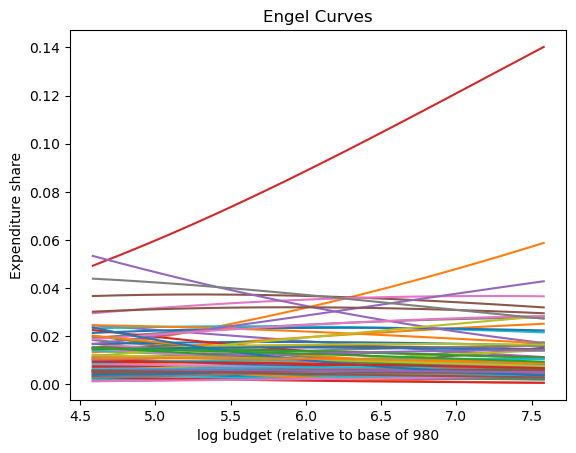

In [27]:
fig,ax = plt.subplots()
scale = np.linspace(0.1, 2, 100)
ax.plot(np.log(scale*xref),[result.expenditures(s*xref,pbar)/(s*xref) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref:.0f}')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves')

## In order to see more details in this graph, we created an interactive plot, where you can click on the different foods to turn off the corresponding line plot

In [28]:
import cufflinks as cf
cf.go_offline()

In [29]:
index = pd.Index(np.log(scale * xref),name='log budget')
df = pd.DataFrame([result.expenditures(s*xref,pbar)/(s*xref) for s in scale],index=index)

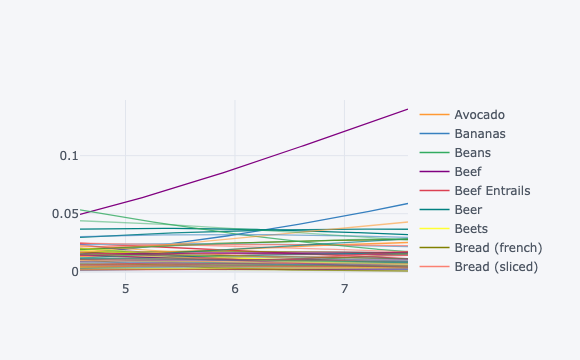

In [30]:
df.iplot()

## Indirect Utility 

Text(0.5, 1.0, 'Indirect Utility Function')

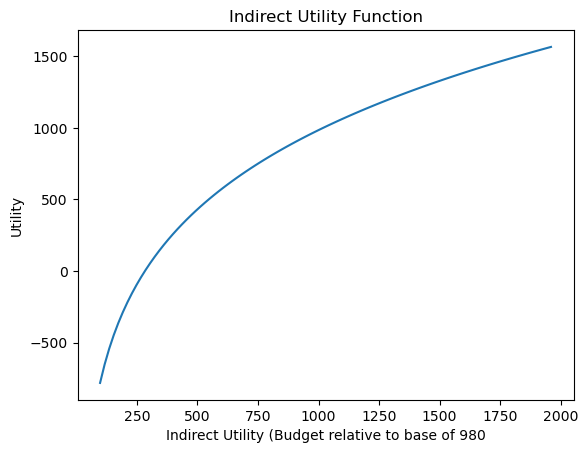

In [31]:
fig,ax = plt.subplots()

ax.plot(scale*xref,[result.indirect_utility(s*xref,pbar) for s in scale])
ax.set_xlabel(f'Indirect Utility (Budget relative to base of {xref:.0f}')
ax.set_ylabel(f'Utility')
ax.set_title('Indirect Utility Function')